In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('data/2021.csv')
df['Volatility'] = df['High'] - df['Low']
max_volatility_day = df.loc[df['Volatility'].idxmax()]
print(max_volatility_day)


Date            12/1/2021
Open          16347.95996
High          16427.18945
Low               15864.0
Close         15877.71973
Adj Close     15877.71973
Volume         6320260000
Volatility      563.18945
Name: 230, dtype: object


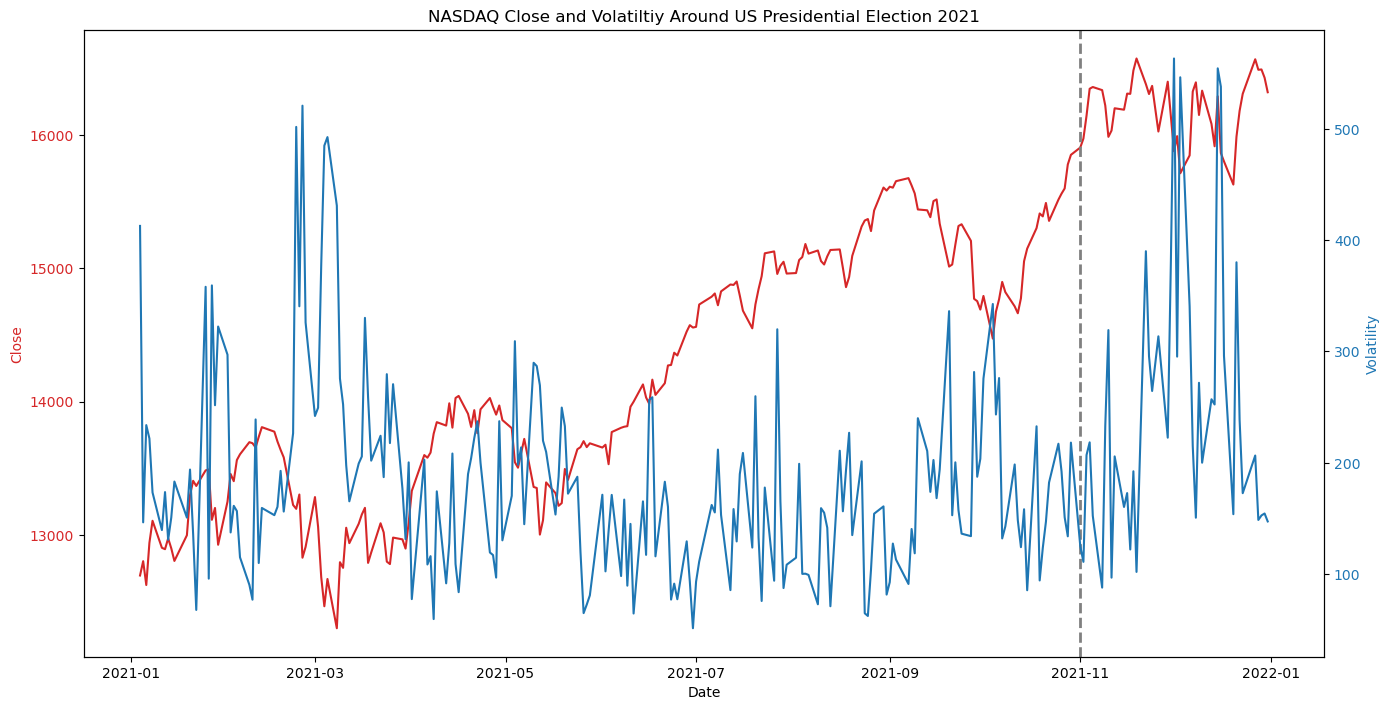

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2021-01-02'
end_date = '2021-12-31'
announcement_date = '2021-11-01'
event_window = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color=color)
ax1.plot(event_window['Date'], event_window['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=pd.to_datetime(announcement_date), color='grey', linestyle='--', lw=2)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volatility', color=color)  # we already handled the x-label with ax1
ax2.plot(event_window['Date'], event_window['Volatility'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('NASDAQ Close and Volatiltiy Around US Presidential Election 2021')
plt.show()